<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LOAD-EXPERIMENTS" data-toc-modified-id="LOAD-EXPERIMENTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LOAD EXPERIMENTS</a></span></li><li><span><a href="#Example-for-pop-vector" data-toc-modified-id="Example-for-pop-vector-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example for pop vector</a></span></li><li><span><a href="#PF-corr-example" data-toc-modified-id="PF-corr-example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PF corr example</a></span><ul class="toc-item"><li><span><a href="#control" data-toc-modified-id="control-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>control</a></span></li><li><span><a href="#CREB" data-toc-modified-id="CREB-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CREB</a></span></li><li><span><a href="#dn-CREB" data-toc-modified-id="dn-CREB-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>dn-CREB</a></span></li></ul></li><li><span><a href="#By-Condition" data-toc-modified-id="By-Condition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>By Condition</a></span></li><li><span><a href="#By-Day" data-toc-modified-id="By-Day-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>By Day</a></span><ul class="toc-item"><li><span><a href="#Control" data-toc-modified-id="Control-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Control</a></span></li><li><span><a href="#CREB" data-toc-modified-id="CREB-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CREB</a></span></li><li><span><a href="#dn-CREB" data-toc-modified-id="dn-CREB-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>dn-CREB</a></span></li></ul></li><li><span><a href="#Reward-change-sessions-sorted" data-toc-modified-id="Reward-change-sessions-sorted-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reward change sessions sorted</a></span><ul class="toc-item"><li><span><a href="#mjd537" data-toc-modified-id="mjd537-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>mjd537</a></span></li><li><span><a href="#control-all" data-toc-modified-id="control-all-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>control all</a></span></li><li><span><a href="#control:-only-day-3" data-toc-modified-id="control:-only-day-3-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>control: only day 3</a></span></li><li><span><a href="#CREB" data-toc-modified-id="CREB-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>CREB</a></span></li><li><span><a href="#mjd533" data-toc-modified-id="mjd533-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>mjd533</a></span></li><li><span><a href="#mjd-534" data-toc-modified-id="mjd-534-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>mjd 534</a></span><ul class="toc-item"><li><span><a href="#all-mice" data-toc-modified-id="all-mice-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>all mice</a></span></li></ul></li><li><span><a href="#dn-CREB" data-toc-modified-id="dn-CREB-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>dn-CREB</a></span></li></ul></li><li><span><a href="#heat-maps-single-cell" data-toc-modified-id="heat-maps-single-cell-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>heat maps single cell</a></span></li><li><span><a href="#Place-field-density-near-reward" data-toc-modified-id="Place-field-density-near-reward-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Place field density near reward</a></span><ul class="toc-item"><li><span><a href="#get-sorted-place-cell-rois" data-toc-modified-id="get-sorted-place-cell-rois-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>get sorted place cell rois</a></span></li></ul></li></ul></div>

# LOAD EXPERIMENTS

In [1]:
import lab.mjd_scripts.helpers as mjd
import lab.mjd_scripts.data_plotter as mjdplot

# colors # colors 
colors = creb.colors
GCAMP_color=creb.colors[0]
CREB_color=creb.colors[1]
DN_color=creb.colors[2]

# set seaborn pallette
sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")
colors = creb.colors
GCAMP_color=creb.colors[0]
CREB_color=creb.colors[1]
DN_color=creb.colors[2]

# set seaborn pallette
sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")



In [2]:
exptGrps,roi_filters = creb.load_creb_experiments(filter_type=None) 

LOADED EXPERIMENT GROUPS: CREB,dn-CREB,Control
Using filter...None


In [3]:
from lab.figures import place_cell_figures as pcf

In [190]:
import random
def place_cells_only_rois(exptGrp,roi_filter=None):
    roi_data_to_plot = []
    rois_to_plot = []
    
    for expt in exptGrp:
        roi_data_to_plot.extend(exptGrp.data(
            roi_filter=exptGrp.pcs_filter(roi_filter=roi_filter))[expt])
        rois_to_plot.extend(exptGrp.roi_tuples(
            roi_filter=exptGrp.pcs_filter(roi_filter=roi_filter),label=exptGrp.args['imaging_label'])[expt])
        
    roi_data_to_plot = np.array(roi_data_to_plot)
    sort_order = np.argsort(np.argmax(roi_data_to_plot, axis=1))
    data_to_plot = roi_data_to_plot[sort_order]
    
    rois_to_plot = [rois_to_plot[i] for i in sort_order ] # mjd
    return data_to_plot,rois_to_plot,sort_order

def plot_heatmaps_same_sort(exptGrp,func1,func2):

    cols = ['condition_day_session','mouseID']
    grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)
    grp2 = exptGrp.filterby(filter_fn=func2,include_columns=cols,inplace=False)

    data,grp1_rois,sort = place_cells_only_rois(grp1)


    # plot grp1
    fig,ax=plt.subplots(1,2,figsize=(10,8)) 
    place.plotPositionHeatmap(grp1,ax=ax[0],title='', plotting_order='place_cells_only',
                cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax[0], grp1,reward_marker_location='normal')


    place.plotPositionHeatmap(grp2,ax=ax[1],title='', plotting_order=grp1_rois,
                cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax[1], grp2,reward_marker_location='normal')
    
    
def plot_heatmaps_same_sort2(exptGrp,func1,func2,func3):

    cols = ['condition_day_session','mouseID']
    grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)
    grp2 = exptGrp.filterby(filter_fn=func2,include_columns=cols,inplace=False)
    grp0 = exptGrp.filterby(filter_fn=func3,include_columns=cols,inplace=False)

    data,grp1_rois,sort = place_cells_only_rois(grp1)

    
    # plot grp1
    fig,ax=plt.subplots(1,3,figsize=(12,6))
    plt.subplots_adjust(wspace=.2)
    
    # worked well for example plot!
    #random.shuffle(grp1_rois)
    
    # 1st     import pdb; pdb.set_trace()
    place.plotPositionHeatmap(grp0,ax=ax[0],title='', plotting_order=grp1_rois,
                cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax[0], grp0,reward_marker_location='normal')

    
    # second position
    place.plotPositionHeatmap(grp1,ax=ax[1],title='', plotting_order='place_cells_only',
                cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax[1], grp1,reward_marker_location='normal')
    ax[1].set_xlabel('Normalized belt position')
    


    # 3rd
    place.plotPositionHeatmap(grp2,ax=ax[2],title='', plotting_order=grp1_rois,
                cbar_visible=True, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax[2], grp2,reward_marker_location='normal',cell_index=True)
    
    mjdplot.right_label(ax[2], 'Cell index', rotation=270, ha='center', va='center')
    
    return fig

# Example for pop vector

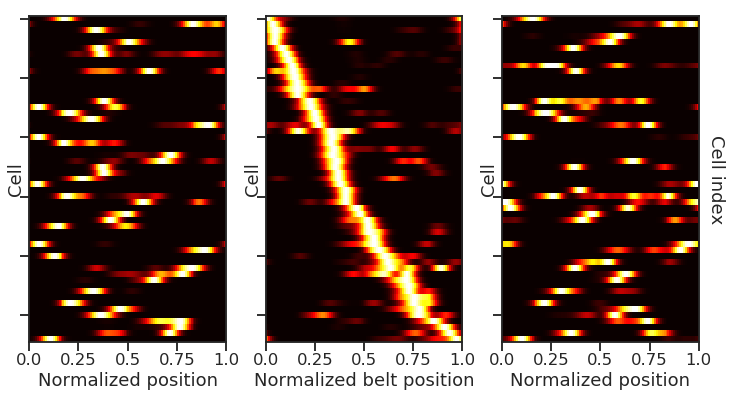

In [36]:
# modified function to do random sort

sns.set('talk')
sns.set_style('ticks')

func1 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd535')
func2 = lambda df: (df['condition_day_session'] == 'A_2_0') & (df['mouseID']=='mjd535')
func3 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd535')

ax = plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

# PF corr example

In [166]:
def plot_cell_two_session(cell,grp1_rois,grp2_rois,data,data2):

    for i,x in enumerate(grp2_rois):
        if x == grp1_rois[cell]:
            ind = i 
            break

    fig = plt.figure(figsize=(5,5))
    ax = sns.lineplot(x=np.arange(0,100),y=data[cell])#,palette = p)
    ax = sns.lineplot(x=np.arange(0,100),y=data2[i])#,palette = p)
    
    ax.set(xticks = (0,50, 100),xticklabels = (0,0.5,1.0))
    
    sns.despine()
    
    return fig
    

## control

In [98]:
func1 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd535')
func2 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd535')

cols = ['condition_day_session','mouseID']
grp1 = exptGrp.filterby(filter_fn=func1,include_columns=cols,inplace=False)
grp2 = exptGrp.filterby(filter_fn=func2,include_columns=cols,inplace=False)

data,grp1_rois,sort = place_cells_only_rois(grp1)
data2,grp2_rois,sort2 = place_cells_only_rois(grp2)

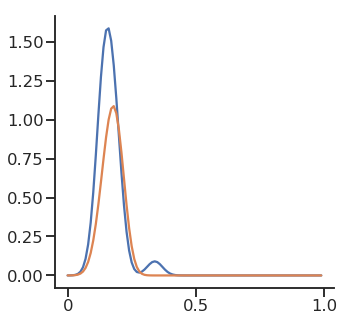

In [118]:
plot_cell_two_session(13,grp1_rois,grp2_rois,data,data2)

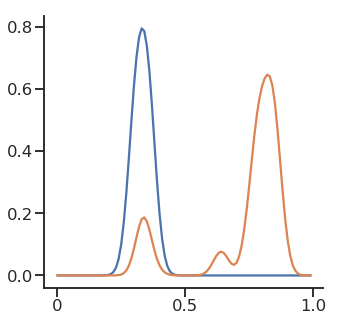

In [119]:
plot_cell_two_session(20,grp1_rois,grp2_rois,data,data2)

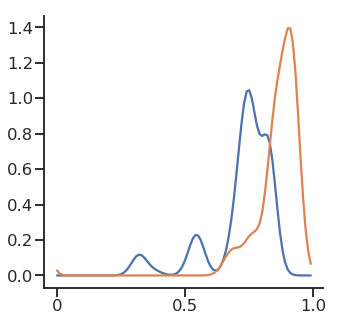

In [169]:
# semi correlated 
fig = plot_cell_two_session(48,grp1_rois,grp2_rois,data,data2)
fig.savefig('2019/figs/pfcorr-example-control.svg')

## CREB

In [122]:
func1 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd529')
func2 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd529')

cols = ['condition_day_session','mouseID']
grp1 = exptGrps[1].filterby(filter_fn=func1,include_columns=cols,inplace=False)
grp2 = exptGrps[1].filterby(filter_fn=func2,include_columns=cols,inplace=False)

cdata,cgrp1_rois,csort = place_cells_only_rois(grp1)
cdata2,cgrp2_rois,csort2 = place_cells_only_rois(grp2)

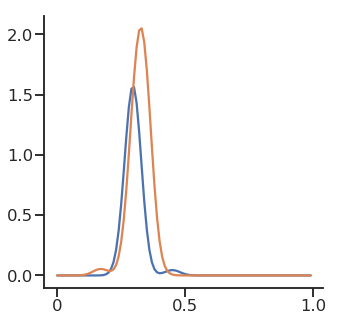

In [180]:
fig = plot_cell_two_session(24,cgrp1_rois,cgrp2_rois,cdata,cdata2)
fig.savefig('2019/figs/pfcorr-example-creb.svg')

## dn-CREB

In [172]:
func1 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd526')
func2 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd526')

cols = ['condition_day_session','mouseID']
grp1 = exptGrps[2].filterby(filter_fn=func1,include_columns=cols,inplace=False)
grp2 = exptGrps[2].filterby(filter_fn=func2,include_columns=cols,inplace=False)

ddata,dgrp1_rois,dsort = place_cells_only_rois(grp1)
ddata2,dgrp2_rois,dsort2 = place_cells_only_rois(grp2)

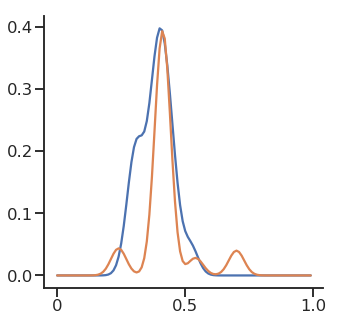

In [181]:
fig = plot_cell_two_session(32,dgrp1_rois,dgrp2_rois,ddata,ddata2)
fig.savefig('2019/figs/pfcorr-example-dncreb.svg')

# By Condition

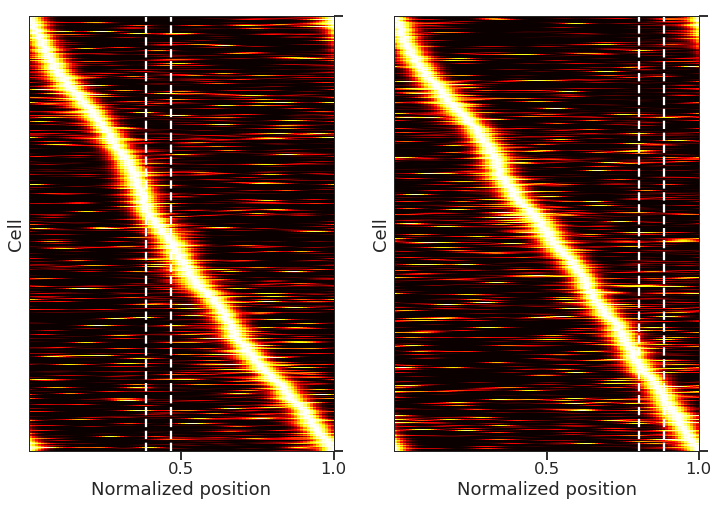

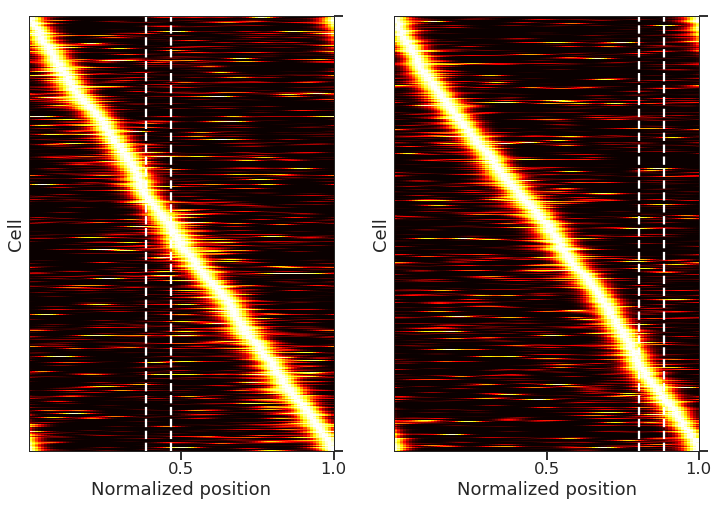

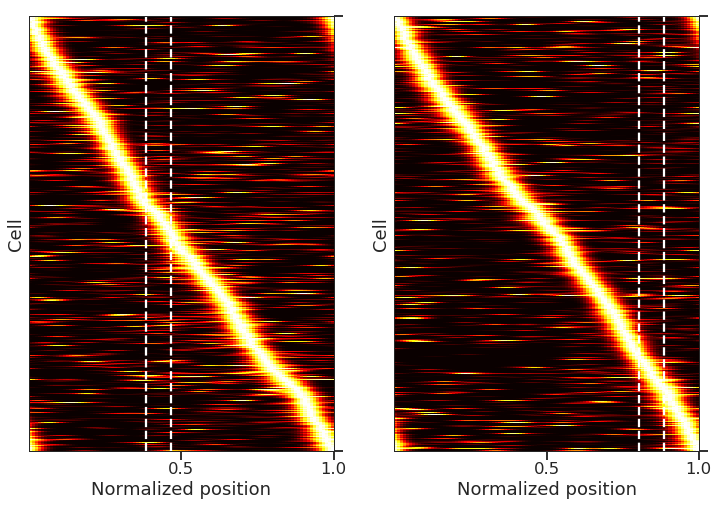

In [62]:

for grp in exptGrps:
    fig,axes=plt.subplots(1,2,figsize=(12,8))
    for e,ax in zip(grp.groupby(["condition"]),axes):

        place.plotPositionHeatmap(e[1],ax=ax,title='', plotting_order='place_cells_only',
                    cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                    show_belt=False, reward_in_middle=False)
        fix_heatmap_ax(ax, e[1],reward_marker_location='normal')

# By Day

## Control

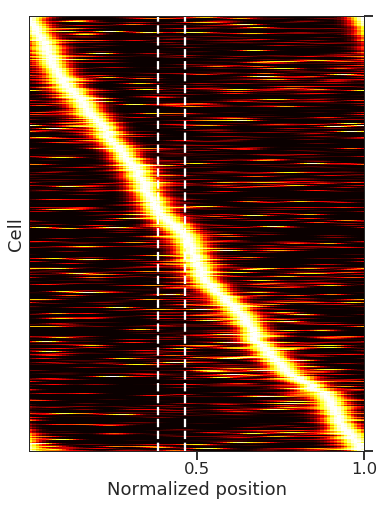

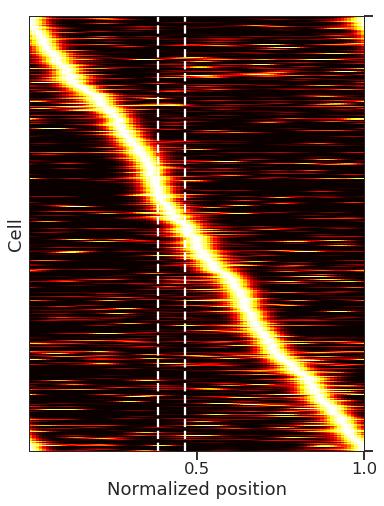

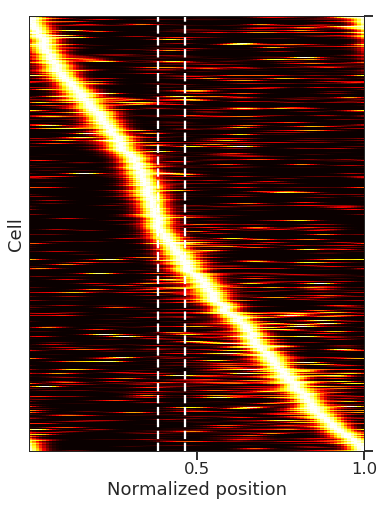

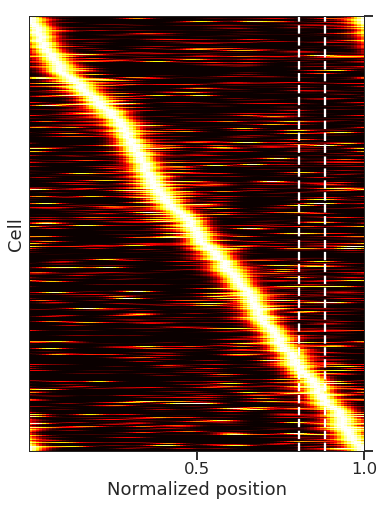

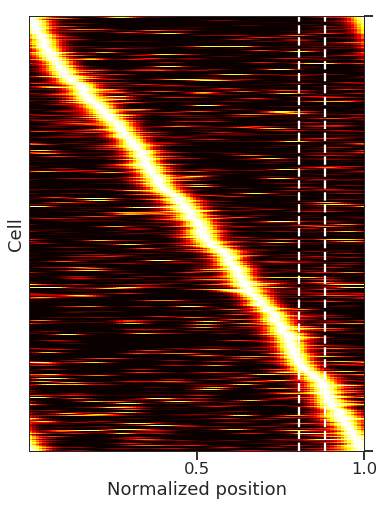

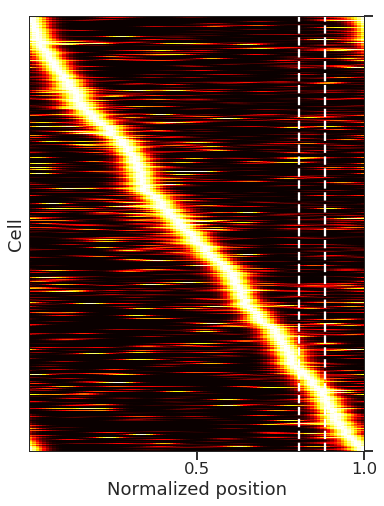

In [6]:
for e in exptGrps[0].groupby(["condition_day"]):
    fig,ax=plt.subplots(1,figsize=(6,8))
    place.plotPositionHeatmap(e[1],ax=ax,title='', plotting_order='place_cells_only',
                cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax, e[1],reward_marker_location='normal')

## CREB

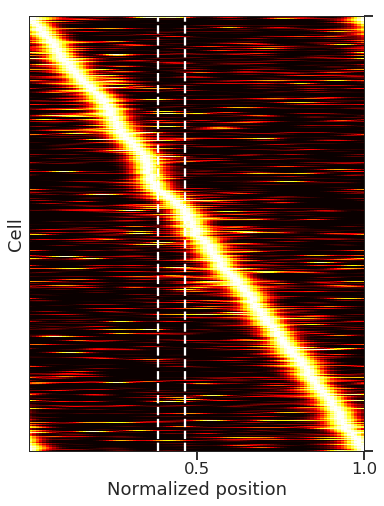

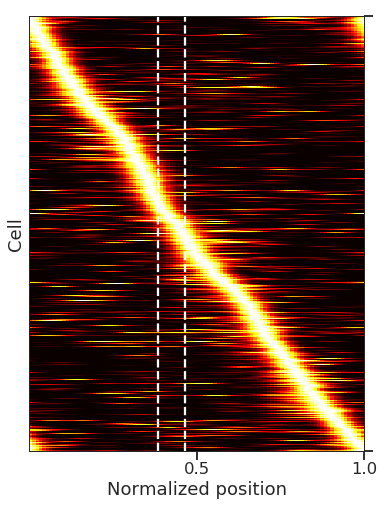

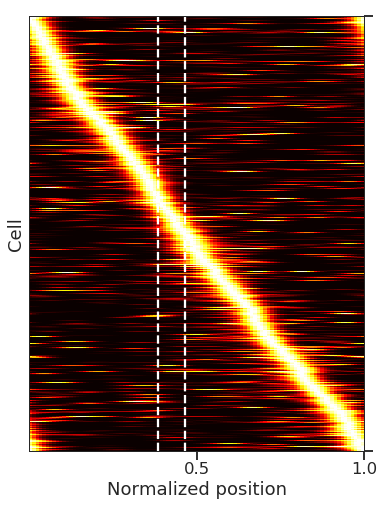

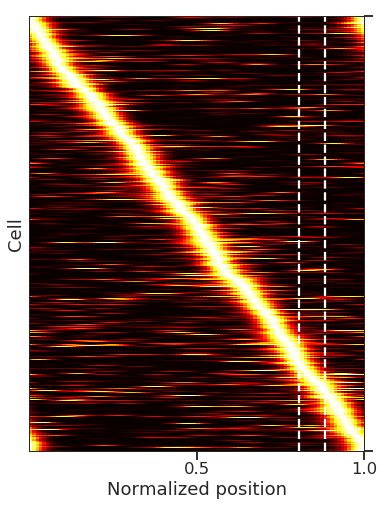

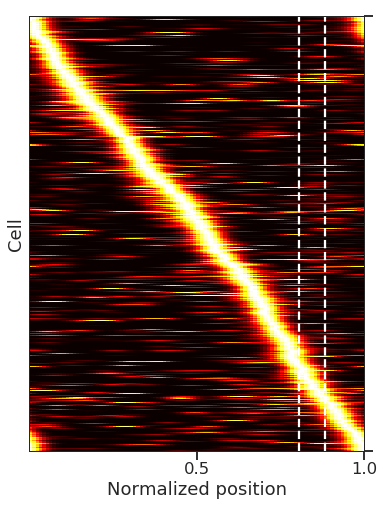

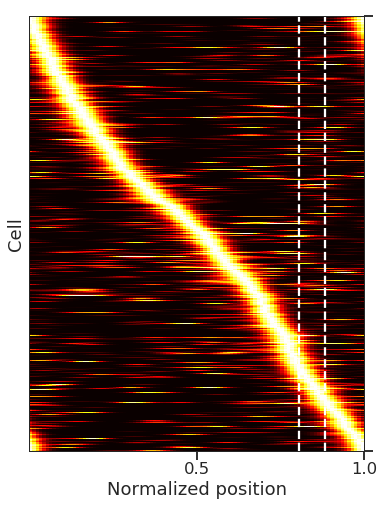

In [7]:
for e in exptGrps[1].groupby(["condition_day"]):
    fig,ax=plt.subplots(1,figsize=(6,8))
    place.plotPositionHeatmap(e[1],ax=ax,title='', plotting_order='place_cells_only',
                cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax, e[1],reward_marker_location='normal')

## dn-CREB

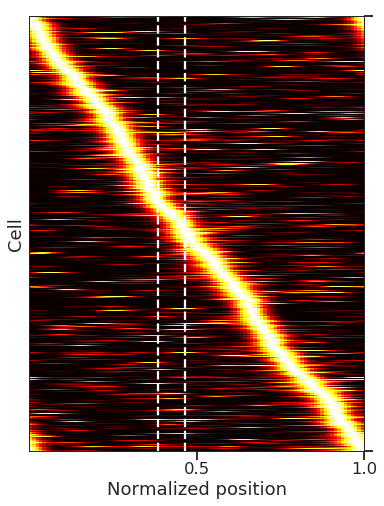

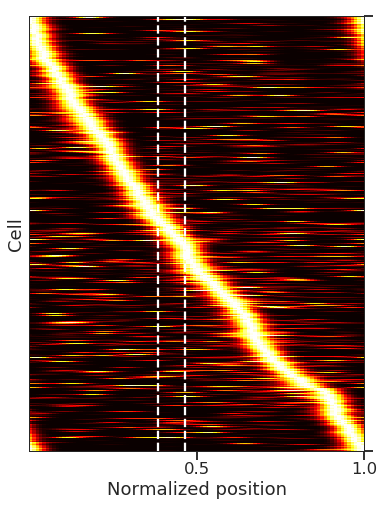

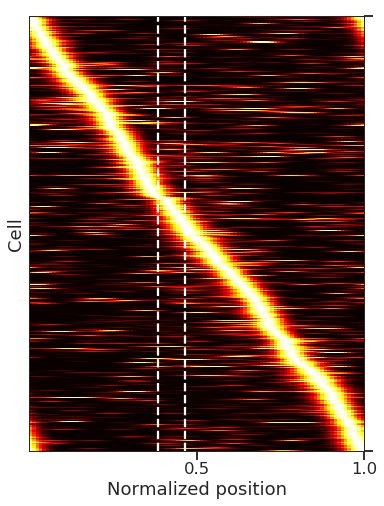

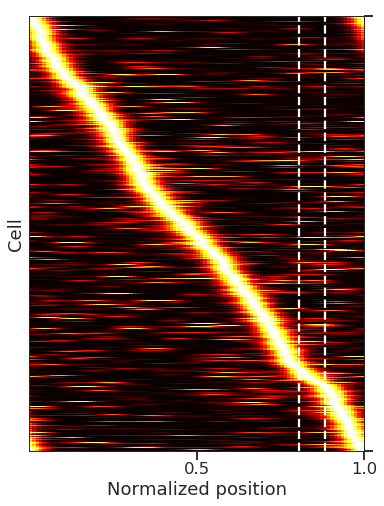

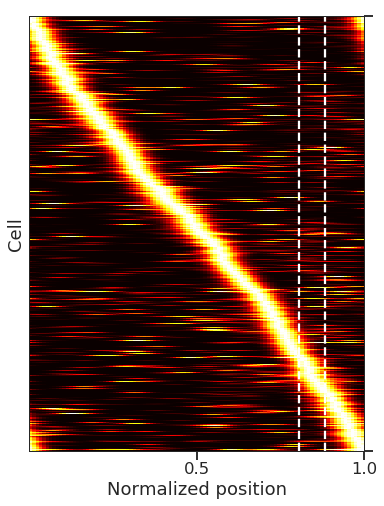

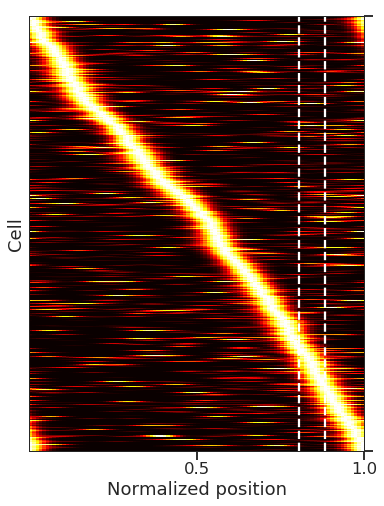

In [8]:
for e in exptGrps[2].groupby(["condition_day"]):
    fig,ax=plt.subplots(1,figsize=(6,8))
    place.plotPositionHeatmap(e[1],ax=ax,title='', plotting_order='place_cells_only',
                cbar_visible=False, cax=None, norm='individual', rasterized=False, cmap='hot',
                show_belt=False, reward_in_middle=False)
    mjdplot.fix_heatmap_ax(ax, e[1],reward_marker_location='normal')

# Reward change sessions sorted

## mjd537

43


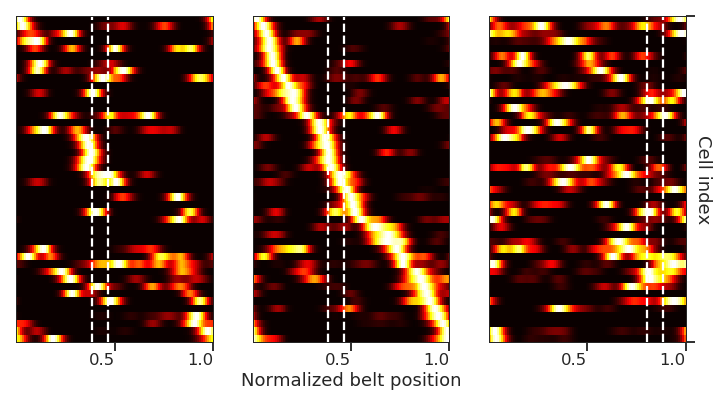

In [126]:
sns.set('talk')
sns.set_style('ticks')

func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd537')
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']=='mjd537')
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd537')

ax = plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

50


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef2695ad0>,
      dtype=object)

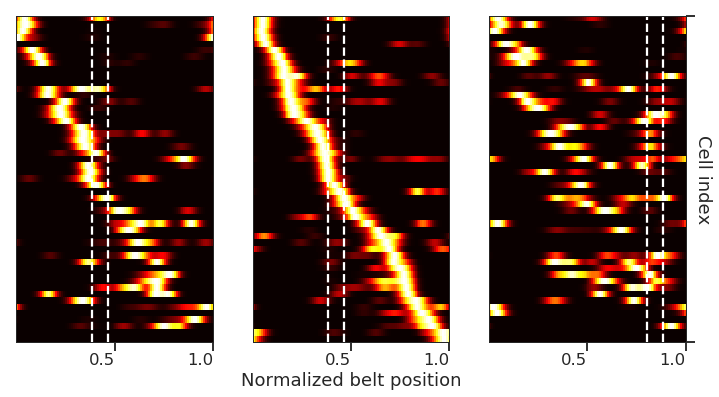

In [127]:
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd535')
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']=='mjd535')
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd535')

plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

42


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef2550c50>,
      dtype=object)

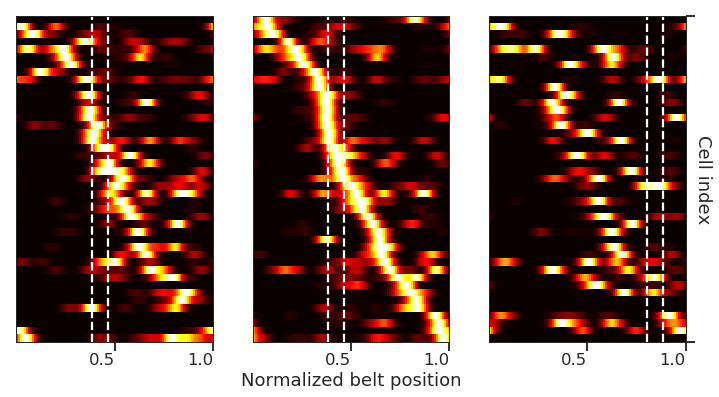

In [128]:
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd511')
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']=='mjd511')
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd511')

plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

24


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef313de10>,
      dtype=object)

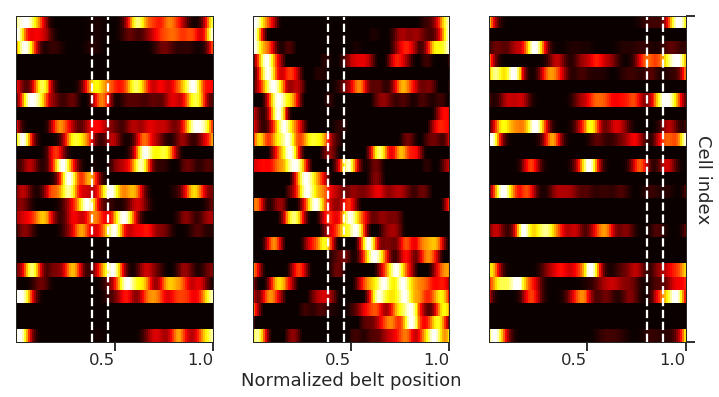

In [146]:
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd500')
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']=='mjd500')
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd500')

plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

34


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef157e890>,
      dtype=object)

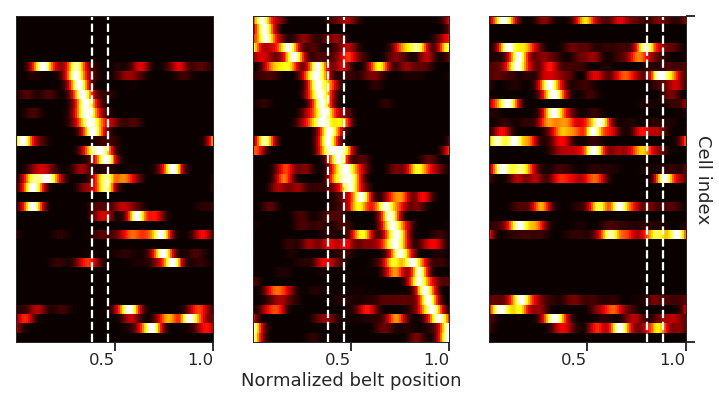

In [143]:
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd503')
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']=='mjd503')
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd503')

plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

## control all

197


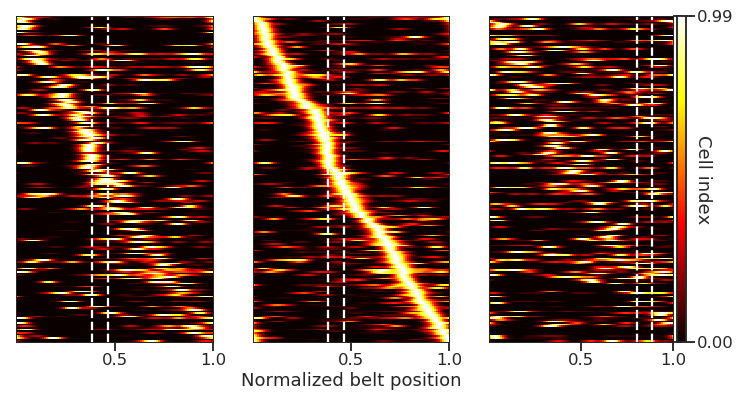

In [192]:
mice=["mjd503","mjd500","mjd511","mjd535","mjd537"]
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID'].isin(mice))
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID'].isin(mice))
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID'].isin(mice))

fig = plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

fig.savefig('2019/figs/heatmap-3session-control.svg')

## control: only day 3

54


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef14b3810>,
      dtype=object)

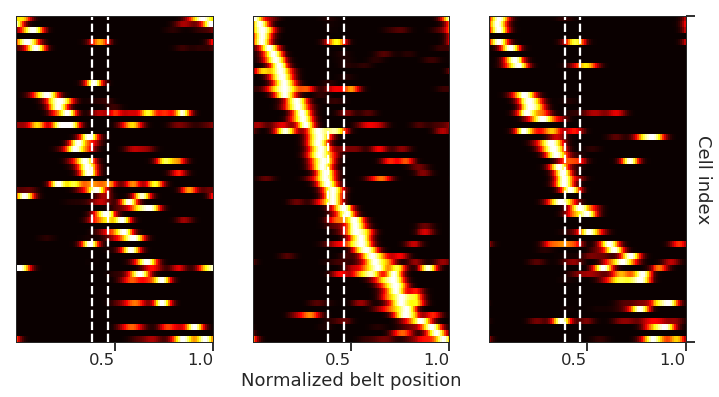

In [144]:

func1 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd535')
func2 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']=='mjd535')
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']=='mjd535')

plot_heatmaps_same_sort2(exptGrps[0],func1,func2,func3)

## CREB

48


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef25564d0>,
      dtype=object)

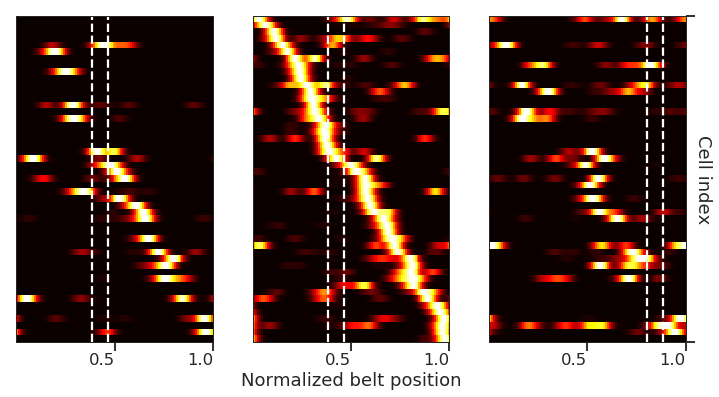

In [130]:
mouse='mjd532'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[1],func1,func2,func3)

## mjd533

40


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef22e2d10>,
      dtype=object)

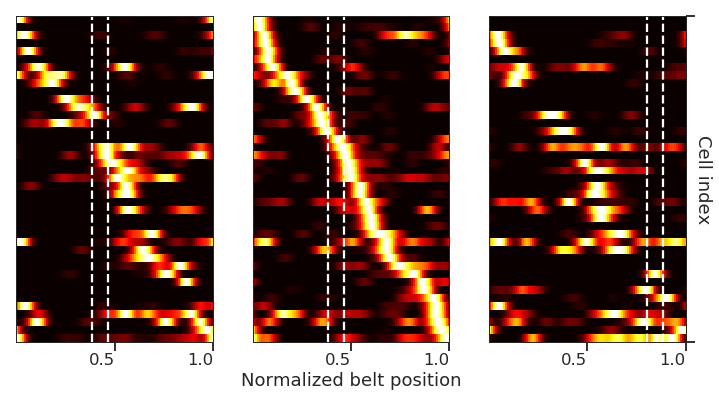

In [131]:
mouse='mjd533'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_sescontrolsion'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[1],func1,func2,func3)

## mjd 534

43


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef21bbd50>,
      dtype=object)

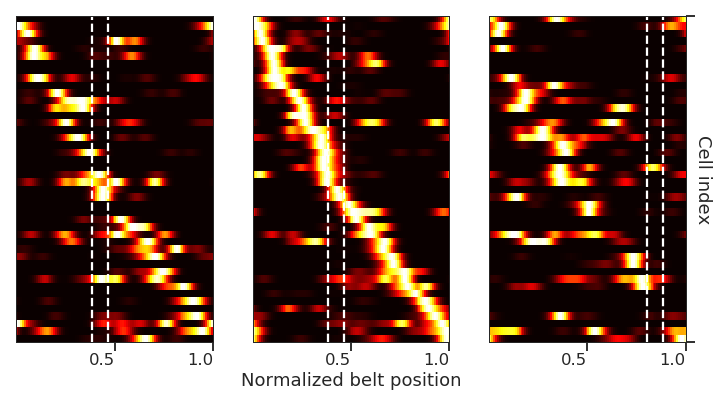

In [132]:
mouse='mjd534'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[1],func1,func2,func3)

64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef2019b90>,
      dtype=object)

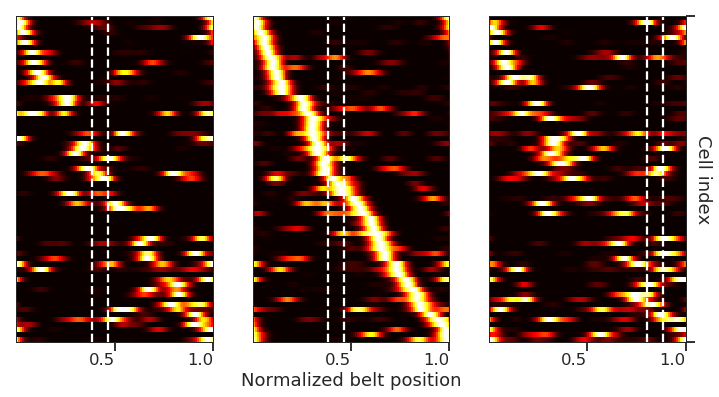

In [133]:
mouse='mjd529'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[1],func1,func2,func3)

62


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5efabe5f90>,
      dtype=object)

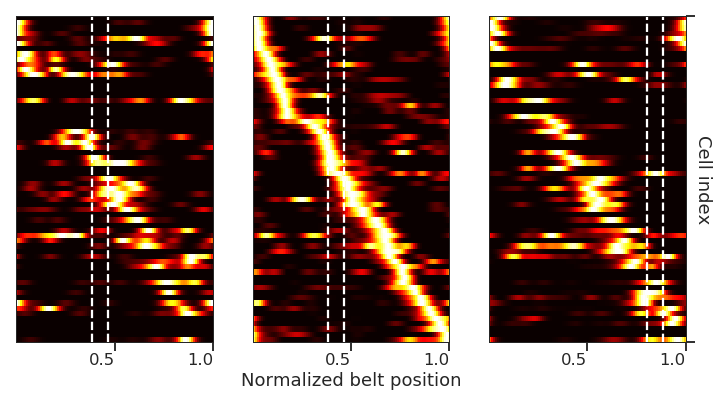

In [148]:
mouse='mjd016'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[1],func1,func2,func3)

### all mice

198


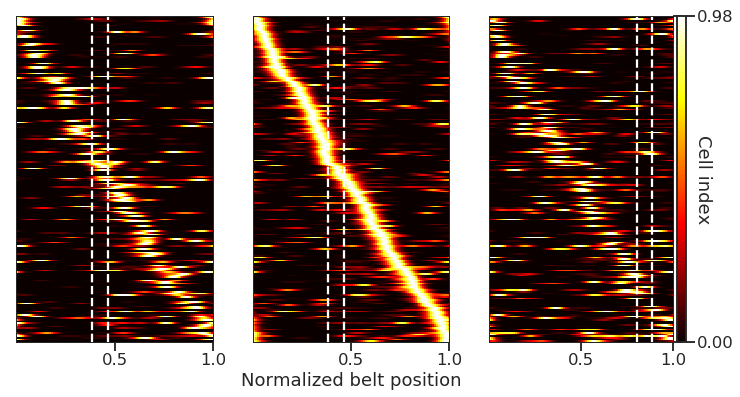

In [193]:
mice = ['mjd532','mjd533','mjd534','mjd529']
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID'].isin(mice))
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID'].isin(mice))
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID'].isin(mice))

fig = plot_heatmaps_same_sort2(exptGrps[1],func1,func2,func3)

fig.savefig('2019/figs/heatmap-3session-creb.svg')

## dn-CREB

43


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef1ef12d0>,
      dtype=object)

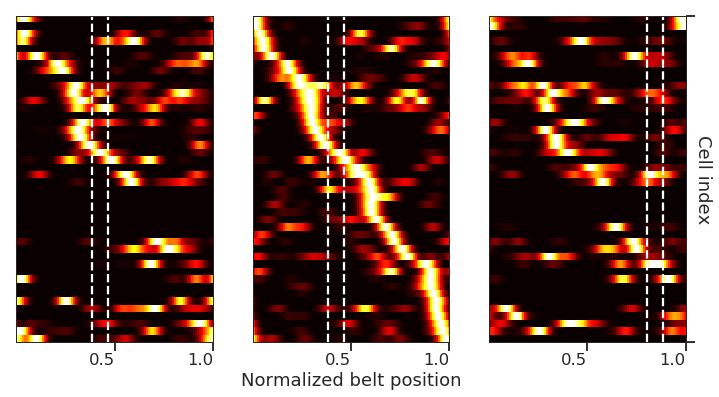

In [135]:
mouse='mjd527'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[2],func1,func2,func3)

60


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef1d40910>,
      dtype=object)

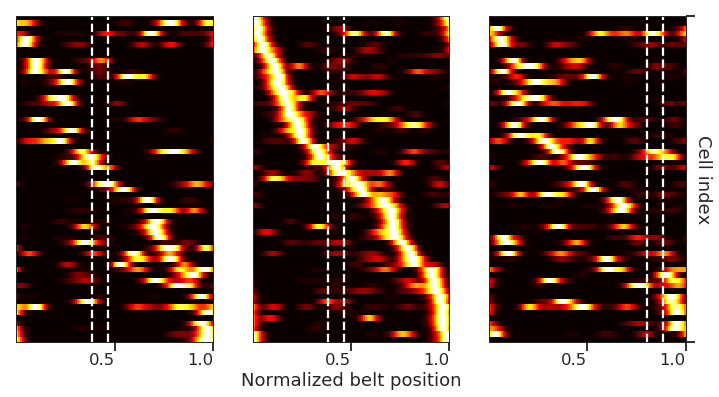

In [136]:
mouse='mjd528'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[2],func1,func2,func3)

74


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef1c04a10>,
      dtype=object)

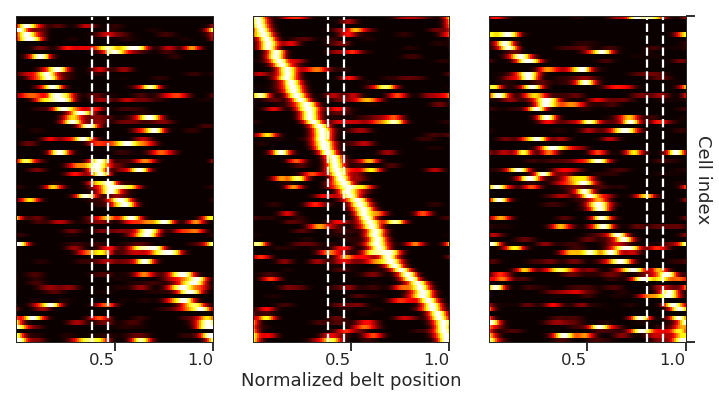

In [137]:
mouse='mjd526'
sessions=()
In [135]:

func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[2],func1,func2,func3)

47


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef1adb990>,
      dtype=object)

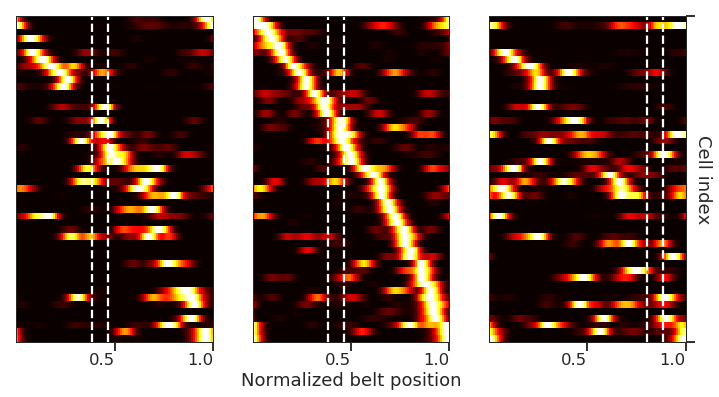

In [138]:
mouse='mjd505'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[2],func1,func2,func3)

50


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef3ed96d0>,
      dtype=object)

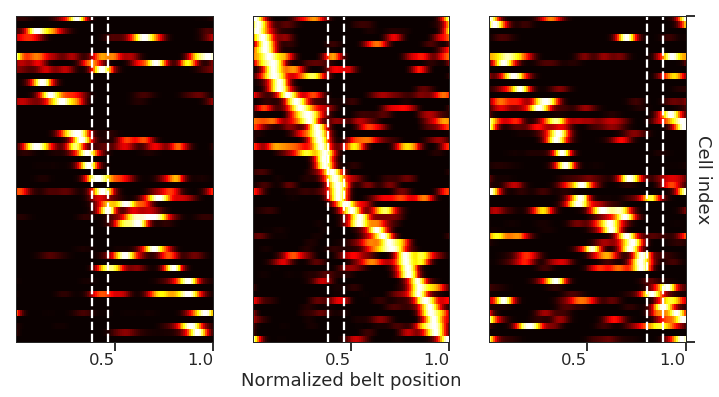

In [147]:
mouse='mjd012'
sessions=()
func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID']==mouse)
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID']==mouse)
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID']==mouse)

plot_heatmaps_same_sort2(exptGrps[2],func1,func2,func3)

227


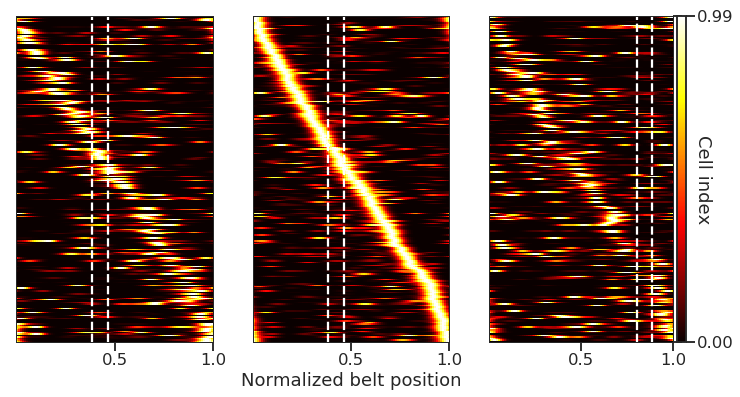

In [195]:
mice = ['mjd527','mjd528','mjd526','mjd505']

func1 = lambda df: (df['condition_day_session'] == 'A_2_2') & (df['mouseID'].isin(mice))
func2 = lambda df: (df['condition_day_session'] == 'B_0_0') & (df['mouseID'].isin(mice))
func3 = lambda df: (df['condition_day_session'] == 'A_2_1') & (df['mouseID'].isin(mice))

fig =  plot_heatmaps_same_sort2(exptGrps[2],func1,func2,func3)

fig.savefig('2019/figs/heatmap-3session-dncreb.svg')

# Place field density near reward

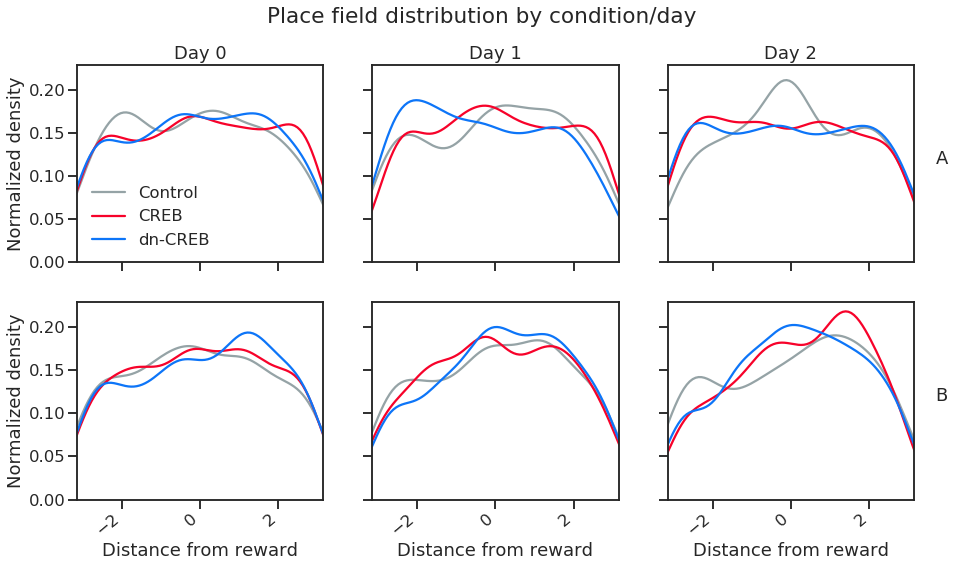

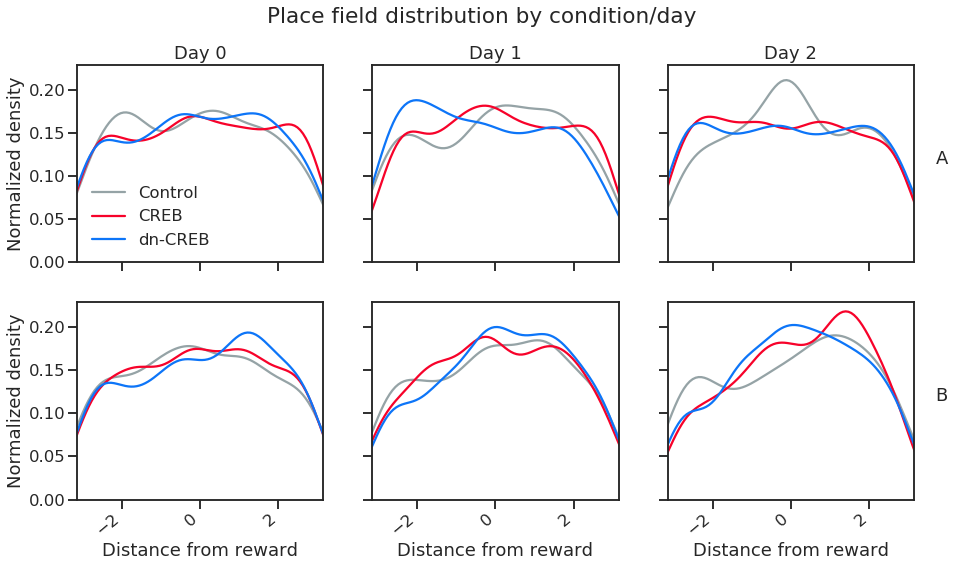

In [102]:
pcf.hidden_rewards_place_field_distribution_density_figure(exptGrps)

In [77]:
# dataframe from grps
grp_dfs = [lab.ExperimentGroup.dataframe(
        expt_grp, include_columns=[
            'condition_day_session', 'condition', 'exposure'])
        for expt_grp in exptGrps]

## get sorted place cell rois

In [9]:


    

data,rois,sort = place_cells_only_rois(grps[10][1])

NameError: name 'grps' is not defined